
## GPTs (Train on 100 and predict the next 10)


In [1]:

##!pip install xgboost


In [2]:

import pandas as pd
import numpy as np


In [3]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb


In [5]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [6]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Read the data


In [7]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [8]:

for_RNN_data_CIVS


,Unnamed: 0,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,...,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,...,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.0
1,2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,...,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.0
2,3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,...,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.0
3,4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,...,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.0
4,5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,...,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1379,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,...,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,1380,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,...,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,1381,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,...,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,1382,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,...,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0


In [9]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [10]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [11]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [12]:

for_RNN_data_CIVS 


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,...,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,...,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,...,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,...,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,...,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,...,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,...,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,...,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,...,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,...,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0



## Plots


In [13]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

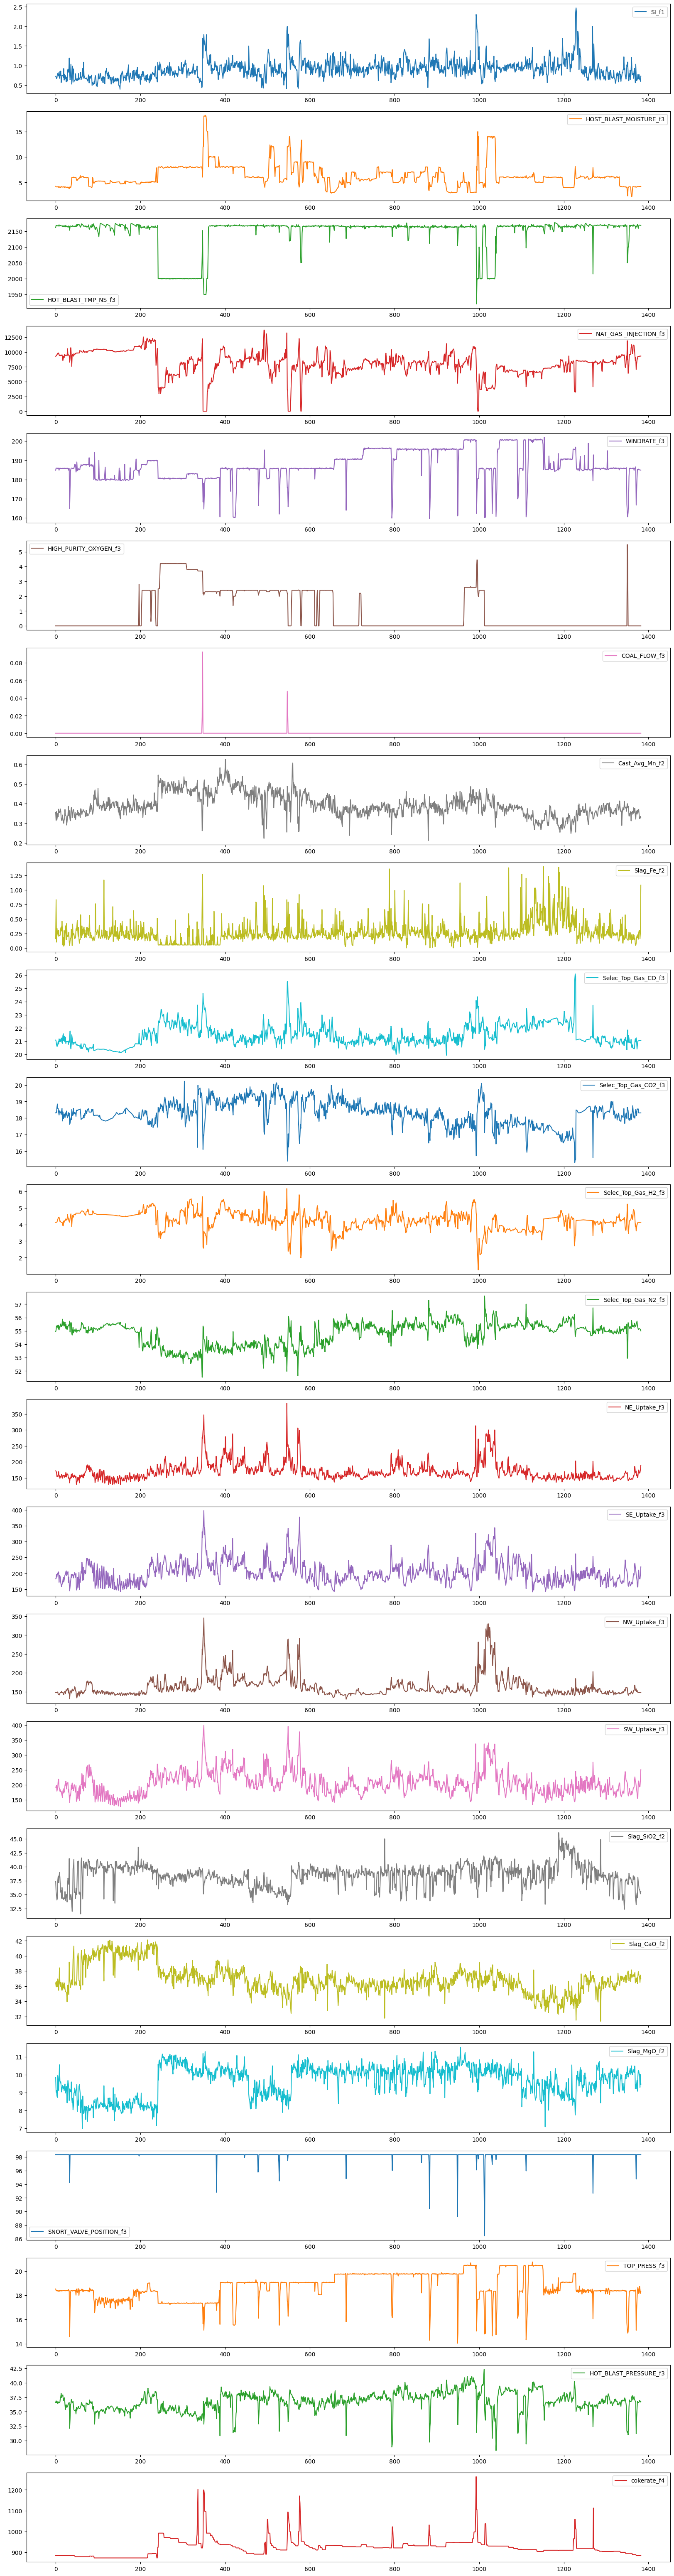

In [14]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [15]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [16]:

pd.options.display.max_columns = None



## Standardize (Scaling)


In [17]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [18]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## Method 1 - GPTs



## Shift and create batches


In [19]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [20]:

'''

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )

bt_train_x.shape

bt_train_y.shape

x_means

'''


'\n\ntrain_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )\n\ntrain_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs\n\nbt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )\n\nbt_train_x.shape\n\nbt_train_y.shape\n\nx_means\n\n'


## Estimate loss - No Training


In [21]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [22]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [23]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [24]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [25]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [26]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        idx = self.map_24_512( idx )

        tok_emb = idx       ## (8, 20, 24)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [27]:

def train_model_GPT(model_type='GPT'):
 
    
    model  = Time_Series_GPT(block_size, 24, 24)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    criterion       = nn.MSELoss()
    
    history = {'loss': [], 'test_loss': []}

    ## train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )
    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS_2 )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)
        
        loss =  criterion( pred, y_train ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs



## Parameters


In [28]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 15   ## 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 16 
max_iters         = 2000   ## 5000
eval_interval     = 500     
learning_rate     = 0.0001
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## The Data


In [29]:

for_RNN_data_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,884.0



## Pick slice randomly


In [30]:

length_n  = int( for_RNN_data_CIVS.shape[0] )

length_n


1383

In [31]:

the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


865

In [32]:

for_RNN_data_CIVS.shape[0]


1383

In [33]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]


In [34]:

sliced_chunk_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
865,0.962290,7.024511,2164.252264,8102.379210,195.807432,0.000000,0.0,0.385,0.39,20.937450,18.308658,4.133215,55.273639,202.610637,211.659974,156.424119,234.310391,39.639999,37.529999,10.74,98.334297,19.771834,37.617711,931.0
866,0.936037,7.054289,2161.531420,8471.186129,195.813113,0.000000,0.0,0.407,0.76,20.844834,18.198439,4.301063,55.369081,185.908792,208.104897,157.414672,230.286358,38.099998,36.950001,10.21,98.334297,19.783076,37.316102,931.0
867,1.030031,7.023398,2164.279473,8492.351834,195.779229,0.000000,0.0,0.403,0.19,20.855409,18.289143,4.345111,55.326467,166.521816,205.140497,155.937964,212.828683,38.900002,37.220001,10.46,98.334297,19.791751,37.403297,931.0
868,0.942780,6.993352,2161.777083,8571.867125,195.751326,0.000000,0.0,0.397,0.18,20.784584,18.064722,4.374812,55.585996,175.424251,210.026098,154.883062,217.710336,40.250000,38.200001,11.27,98.334297,19.782565,37.229753,931.0
869,0.989833,7.081501,2161.310811,8581.504761,195.932704,0.000000,0.0,0.404,0.20,20.897634,18.014160,4.392894,55.625213,170.160526,208.145761,154.087127,219.599972,39.119999,37.049999,10.38,98.334297,19.783667,37.245874,931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.839564,5.143670,2164.520993,8657.845689,200.693553,2.599301,0.0,0.415,0.32,21.895914,18.401875,4.422188,54.190226,162.042998,196.404661,152.702873,200.850042,40.910000,36.959999,10.75,98.334297,20.493739,39.560951,947.0
976,0.876140,4.985495,2165.427900,9334.510299,200.533580,2.600868,0.0,0.412,0.19,22.396778,18.015779,4.614048,53.856132,159.053540,182.975826,154.307522,183.523523,40.689999,36.650002,10.40,98.334297,20.466884,39.670541,947.0
977,0.823128,5.001390,2163.683702,9360.983482,200.588609,2.599083,0.0,0.411,0.17,22.422150,18.082651,4.429543,54.049282,158.018316,172.172304,152.219279,171.928952,40.439999,37.840000,10.72,98.334297,20.468301,39.563394,947.0
978,0.958762,4.214415,2163.607534,9369.068825,200.580983,2.600498,0.0,0.451,0.11,23.222490,17.407943,4.316727,53.990546,150.647132,161.323735,146.960803,160.995296,38.930000,37.790001,10.21,98.334297,20.477500,39.781455,947.0



## Train and test


In [35]:

n = block_size


In [36]:

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]


In [37]:

train_CIVS.shape


(100, 24)

In [38]:

test_CIVS.shape


(15, 24)

In [39]:

'''

## Train with both train and test to see if improvement


frames = [ train_CIVS, test_CIVS ]

train_CIVS_2 = pd.concat( frames )

train_CIVS_2.shape

'''


'\n\n## Train with both train and test to see if improvement\n\n\nframes = [ train_CIVS, test_CIVS ]\n\ntrain_CIVS_2 = pd.concat( frames )\n\ntrain_CIVS_2.shape\n\n'

In [40]:

train_CIVS_2 = train_CIVS



## Train the GPT


In [41]:


si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')



torch.Size([100, 24])
0 train loss =  1.5346909761428833
500 train loss =  0.02175571210682392
1000 train loss =  0.009052352979779243
1500 train loss =  0.006341508589684963



## Plot train losses


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


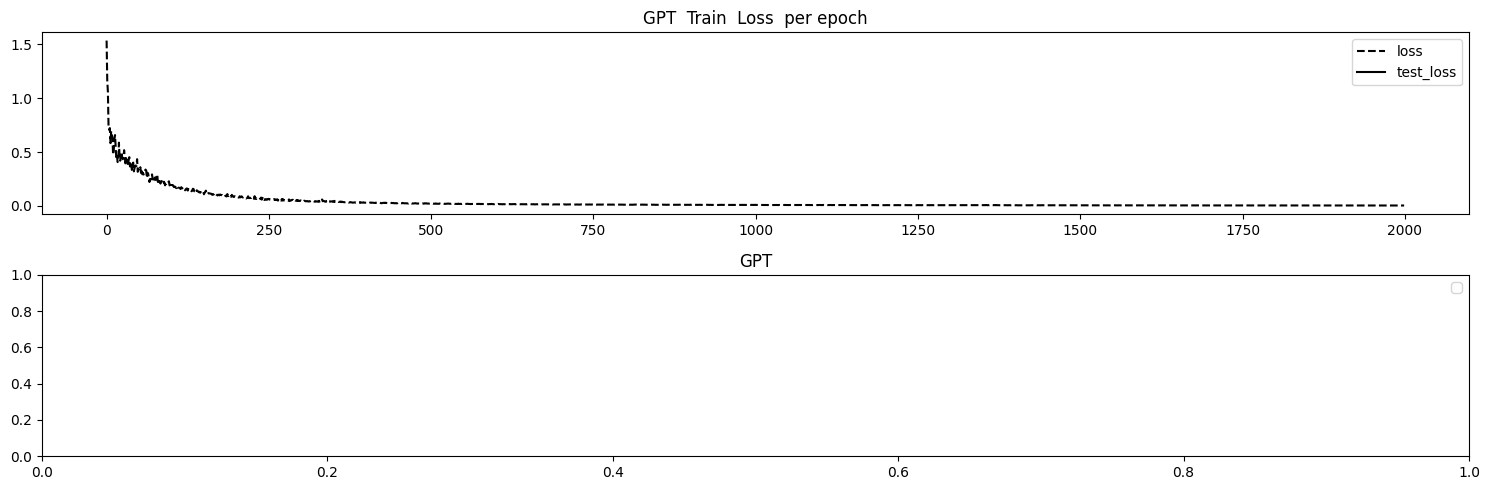

In [42]:

fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()



## Generate with GPT

* Input of 5


In [43]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [44]:

def GPT_generate_inference(model, x_test, which_feature, string_feature):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().numpy() 
    y_real_gpt     =     yb_test.detach().numpy() 
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
    print(l_real)
    print(l_pred)
    print( "Testing R**2: ", r2_score(  l_real,  l_pred     )  )


    #######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:, ], l_pred[0] ) )
    
    l_pred = np.roll(l_pred, -1)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

    ##########################################

    train_plot = torch.tensor(train_CIVS_2.values).float().numpy()
    print( train_plot.shape )
    train_real_plot = train_plot[:, 0]
    ## l_real  = np.concatenate( ( train_real_plot[1: ], train_real_plot[:1] ) )
    l_real  = np.concatenate( ( train_real_plot, l_real ) )
    l_pred  = np.concatenate( ( train_real_plot, l_pred ) )
    ######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

 

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT Generate')
    ##ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ##ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].scatter(x, l_real, label = "real", color='red') 
    ax[0].plot(   x, l_real, label = "real", color='red') 
    ax[0].scatter(x, l_pred, label = "pred", color='blue') 
    ax[0].plot(   x, l_pred, label = "pred", color='blue') 
    ax[0].legend()
    
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()



In [45]:

test_CIVS.shape



(15, 24)

In [46]:

train_CIVS.shape


(100, 24)

In [47]:

train_CIVS[ -5: ]


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,cokerate_f4
960,0.935206,5.005992,2164.936802,7686.531637,195.765347,0.000000,0.0,0.431,0.22,21.009181,17.645437,4.575589,55.526612,167.498938,216.209378,156.149775,212.933136,39.790001,37.439999,10.56,98.334297,19.782871,39.992810,947.0
961,0.759233,5.019128,2164.595062,7388.109902,195.777973,0.000000,0.0,0.403,0.19,21.506172,17.622570,4.225371,55.548139,160.977943,195.871033,158.574357,198.244480,39.509998,38.049999,10.79,98.334297,19.774149,39.496282,947.0
962,0.906630,5.493038,2161.282209,8044.981228,195.784686,0.000000,0.0,0.360,0.25,21.064831,17.646434,4.434525,55.679654,173.565841,218.574848,170.780645,219.188773,40.099998,37.529999,10.78,98.334297,19.770109,38.347530,947.0
963,0.867518,6.936289,2164.614085,7931.890598,196.436273,0.000000,0.0,0.394,0.22,21.266895,17.393232,4.727606,55.347733,167.356848,199.512212,159.843908,203.696606,40.080002,37.840000,10.68,98.334297,19.865046,38.598943,947.0
964,0.969897,6.702025,2163.420597,7992.161841,200.210979,0.421643,0.0,0.410,0.23,21.292737,17.420720,4.634883,55.304294,165.542452,186.790053,154.160728,193.329182,40.189999,37.820000,10.75,98.334297,20.463883,40.149617,947.0


In [48]:


frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape


(20, 24)

In [49]:

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )


torch.Size([20, 24])


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 15, 24])


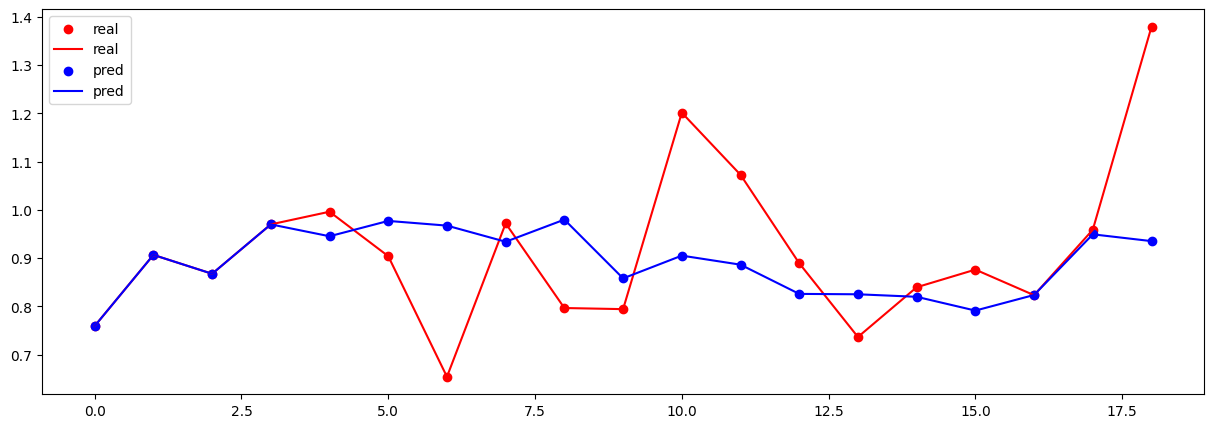

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


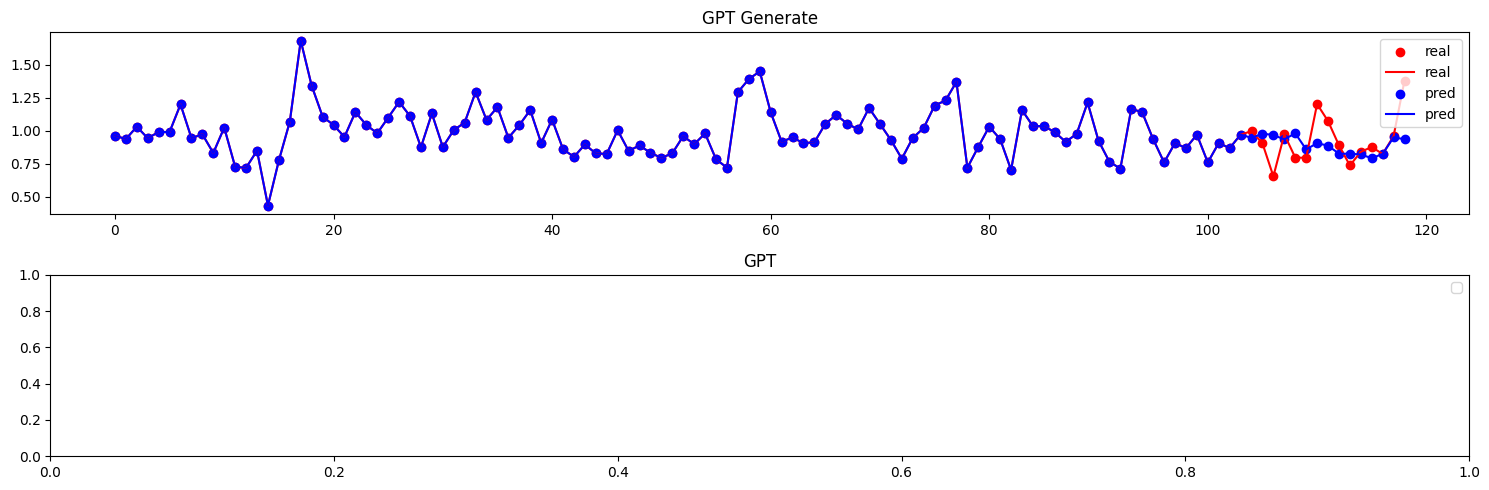

In [50]:


batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")



## Run 2


In [51]:

the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


635

In [52]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

sliced_chunk_CIVS.shape 


(115, 24)

In [53]:

n = block_size

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

print(train_CIVS.shape)


(100, 24)


In [54]:

train_CIVS_2 = train_CIVS


In [55]:

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([100, 24])
0 train loss =  1.3483799695968628
500 train loss =  0.021755581721663475
1000 train loss =  0.00870507676154375
1500 train loss =  0.005197823978960514


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


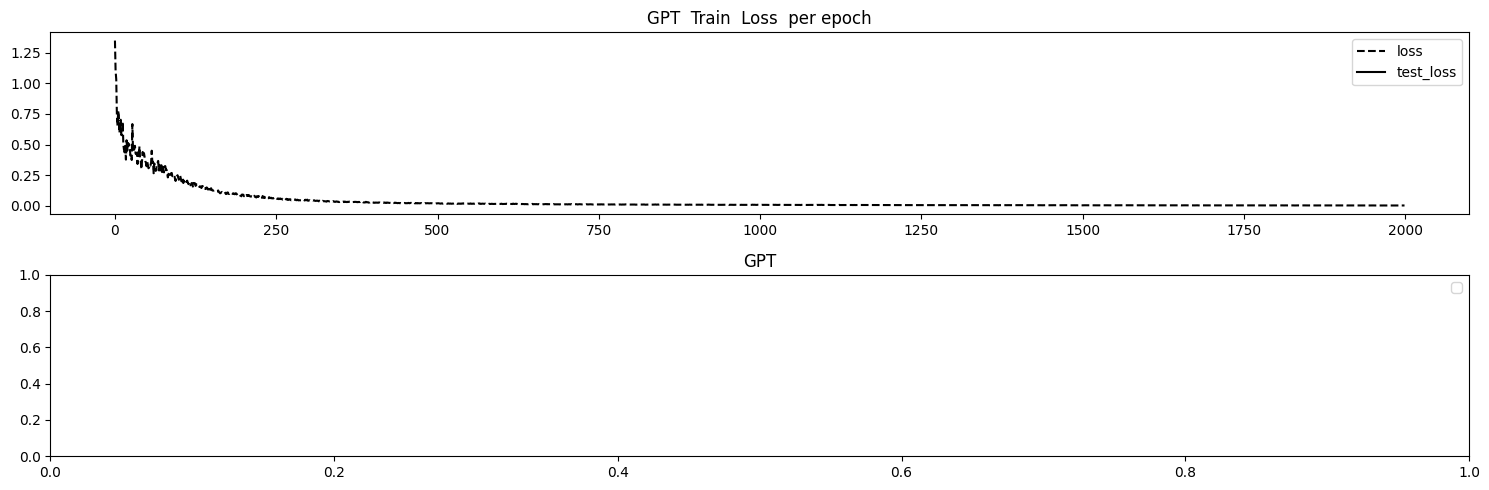

In [56]:


fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()


In [57]:

frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape


(20, 24)

In [58]:

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )


torch.Size([20, 24])


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 15, 24])


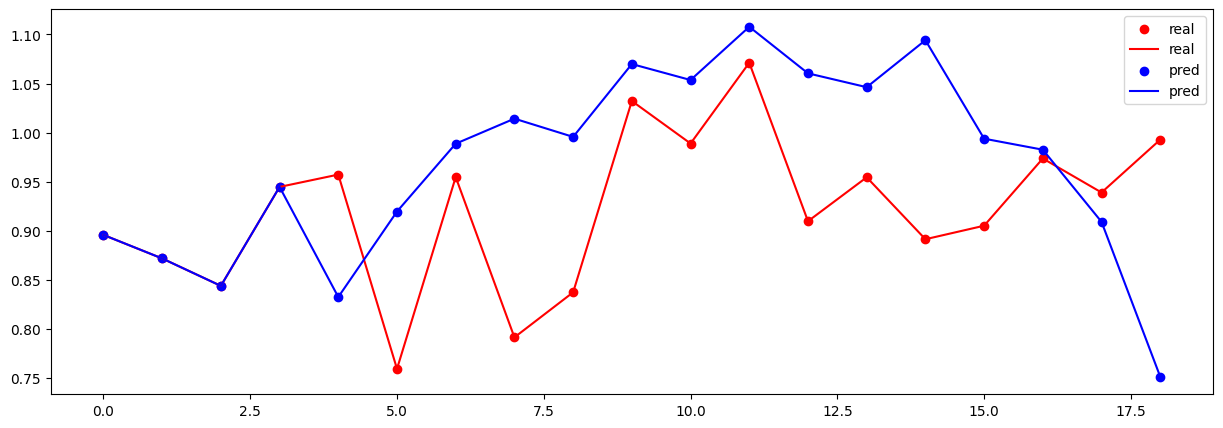

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


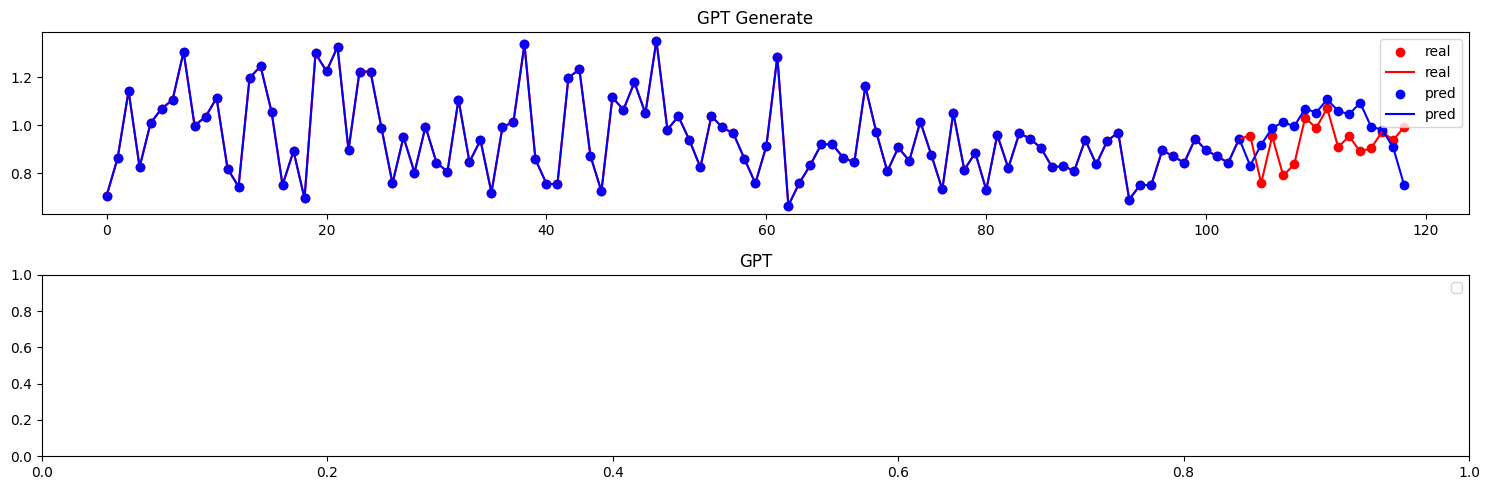

In [59]:

batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")



## Run 3


In [60]:

the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


192

In [61]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

sliced_chunk_CIVS.shape 



(115, 24)

In [62]:

n = block_size

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

print(train_CIVS.shape)


(100, 24)


In [63]:

train_CIVS_2 = train_CIVS


In [64]:

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([100, 24])
0 train loss =  1.2137857675552368
500 train loss =  0.027432942762970924
1000 train loss =  0.009218011051416397
1500 train loss =  0.005262220744043589


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


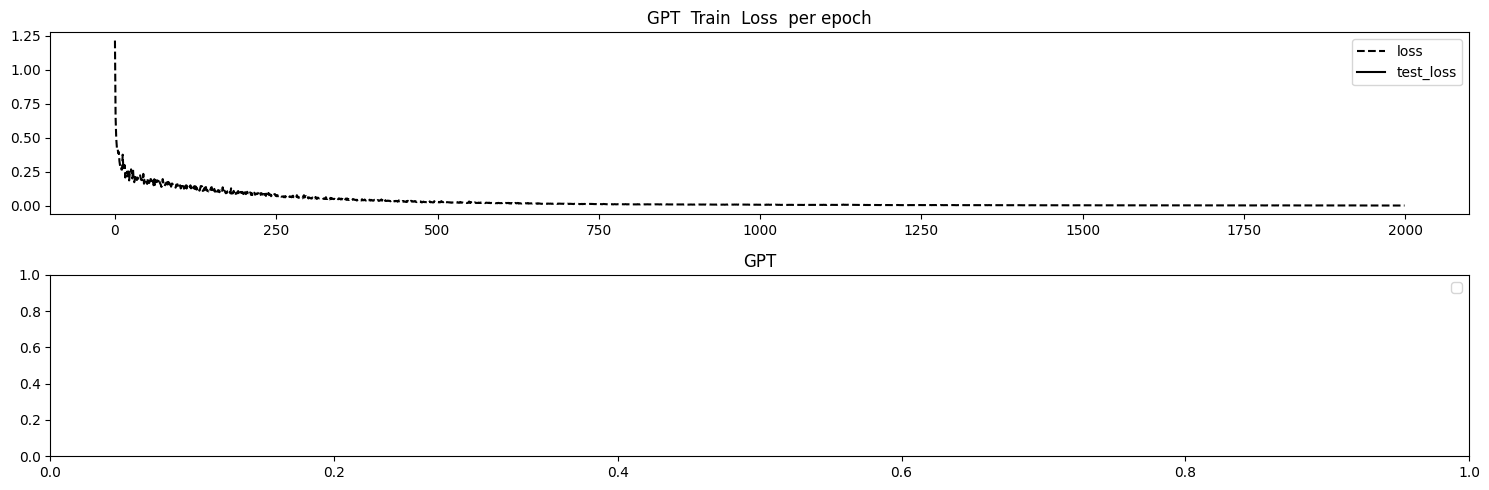

In [65]:

fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()



In [66]:

frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape


(20, 24)

In [67]:

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )


torch.Size([20, 24])


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 15, 24])


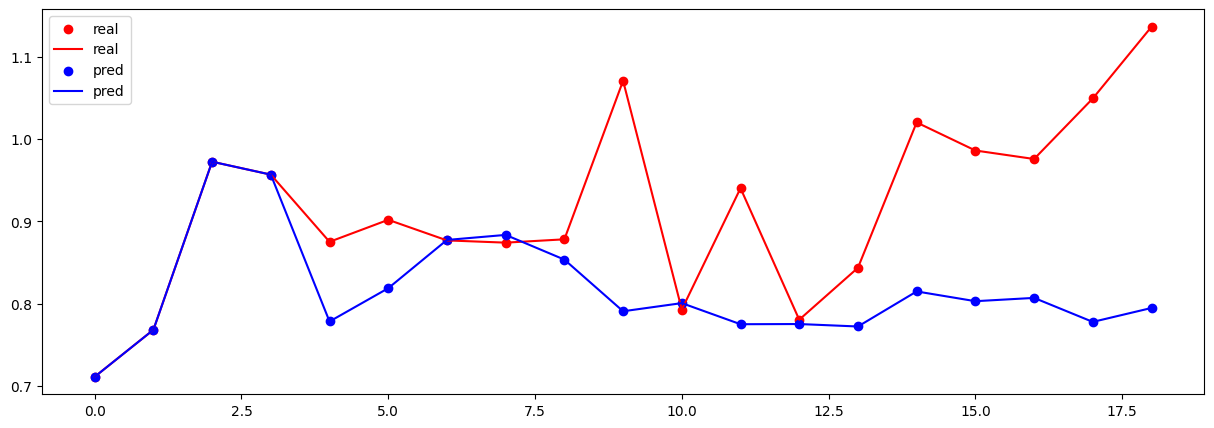

(100, 24)
119


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


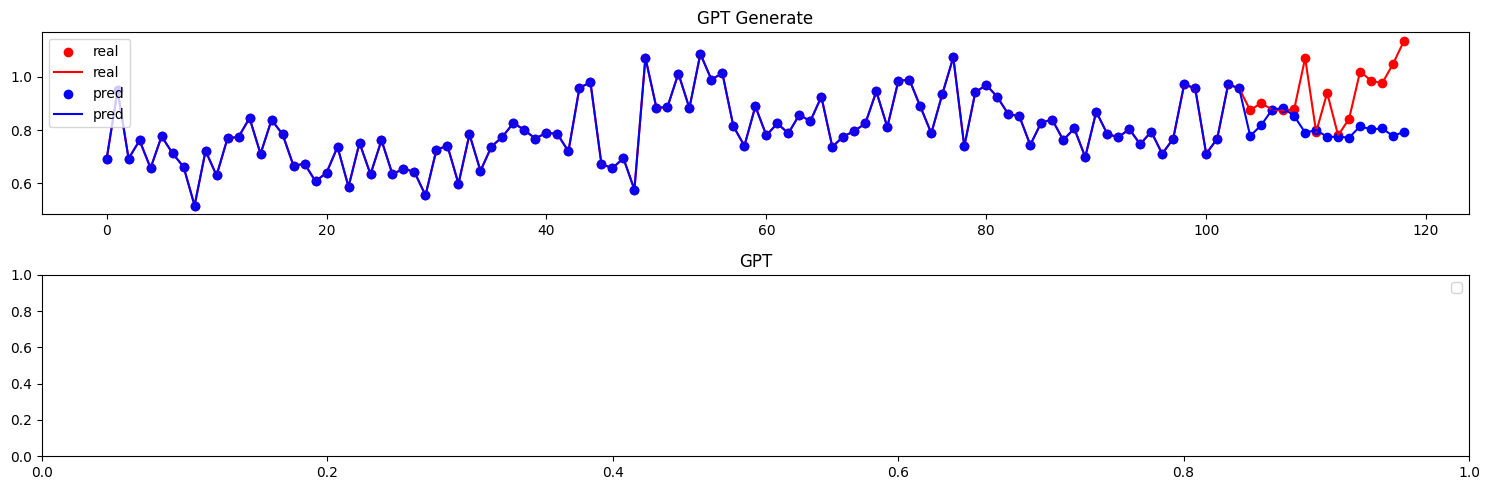

In [68]:

batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")



## Run 4


In [69]:


the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice



15

In [70]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

sliced_chunk_CIVS.shape 


(115, 24)

In [71]:

n = block_size

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

print(train_CIVS.shape)


(100, 24)


In [72]:

train_CIVS_2 = train_CIVS


In [73]:

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([100, 24])
0 train loss =  1.220415711402893
500 train loss =  0.020613914355635643
1000 train loss =  0.00872728694230318
1500 train loss =  0.005725857801735401


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


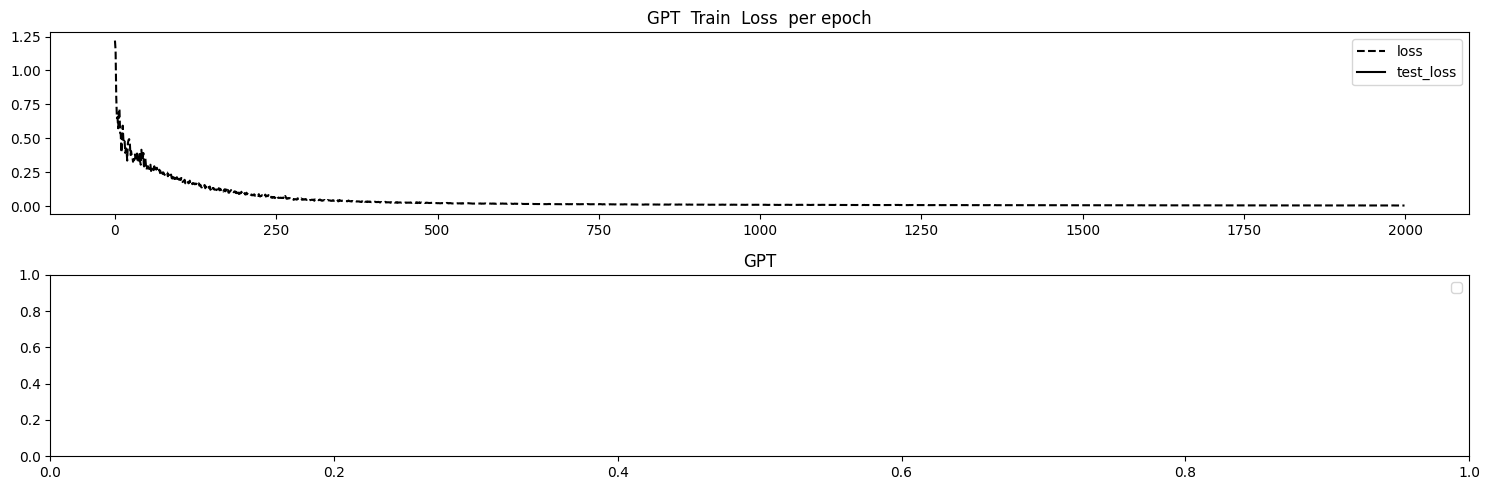

In [74]:

fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()




In [75]:

frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape


(20, 24)

In [76]:

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )


torch.Size([20, 24])


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
torch.Size([1, 15, 24])


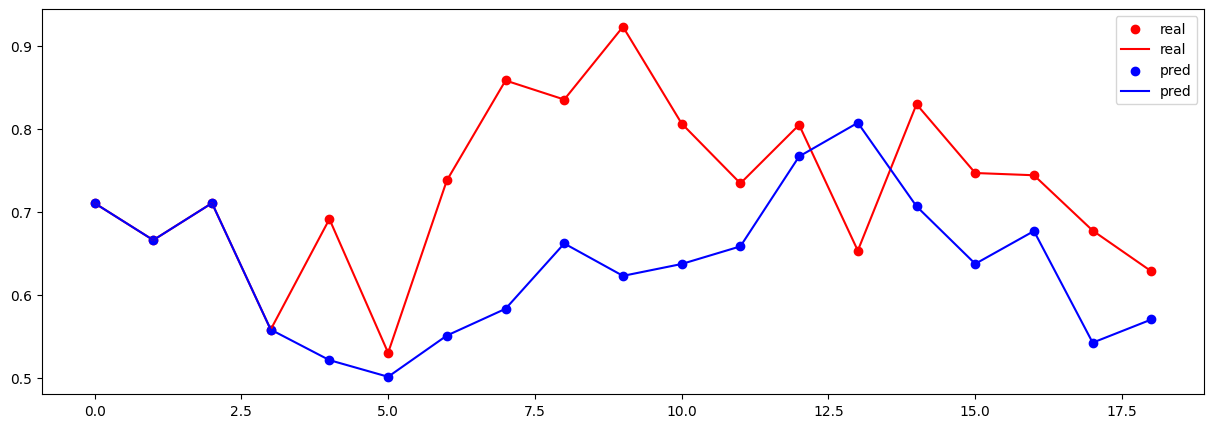

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


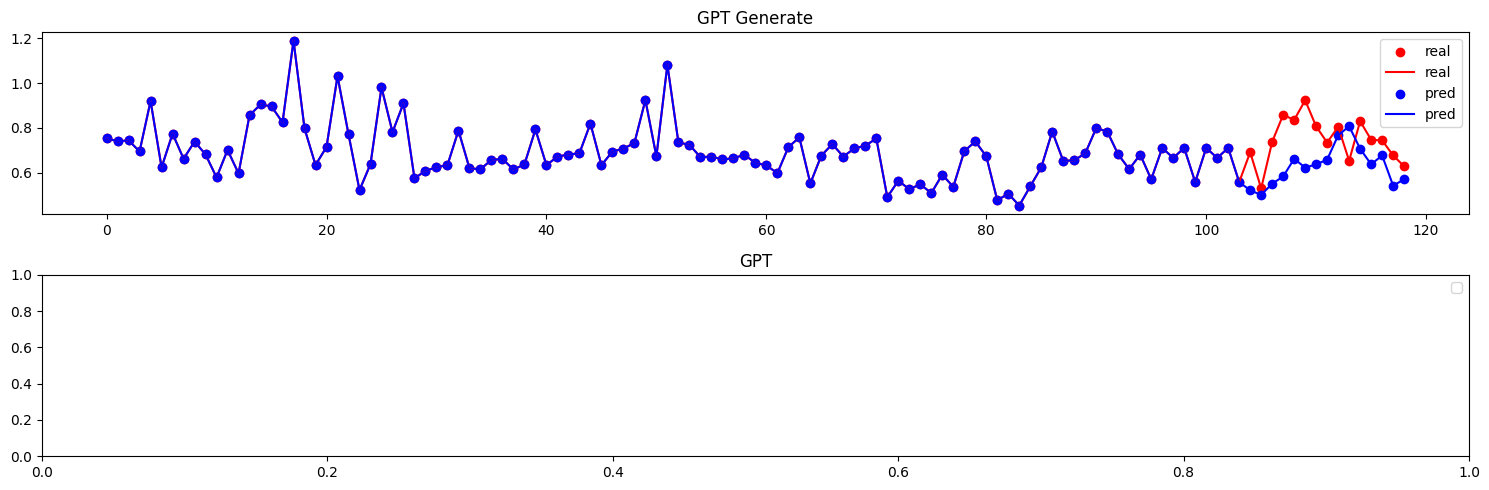

In [77]:

batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")



## Run 5


In [78]:

the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice



1265

In [79]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

sliced_chunk_CIVS.shape 


(115, 24)

In [80]:

n = block_size

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

print(train_CIVS.shape)


(100, 24)


In [81]:

train_CIVS_2 = train_CIVS

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([100, 24])
0 train loss =  1.026953101158142
500 train loss =  0.025118451565504074
1000 train loss =  0.009715643711388111
1500 train loss =  0.005822846665978432


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


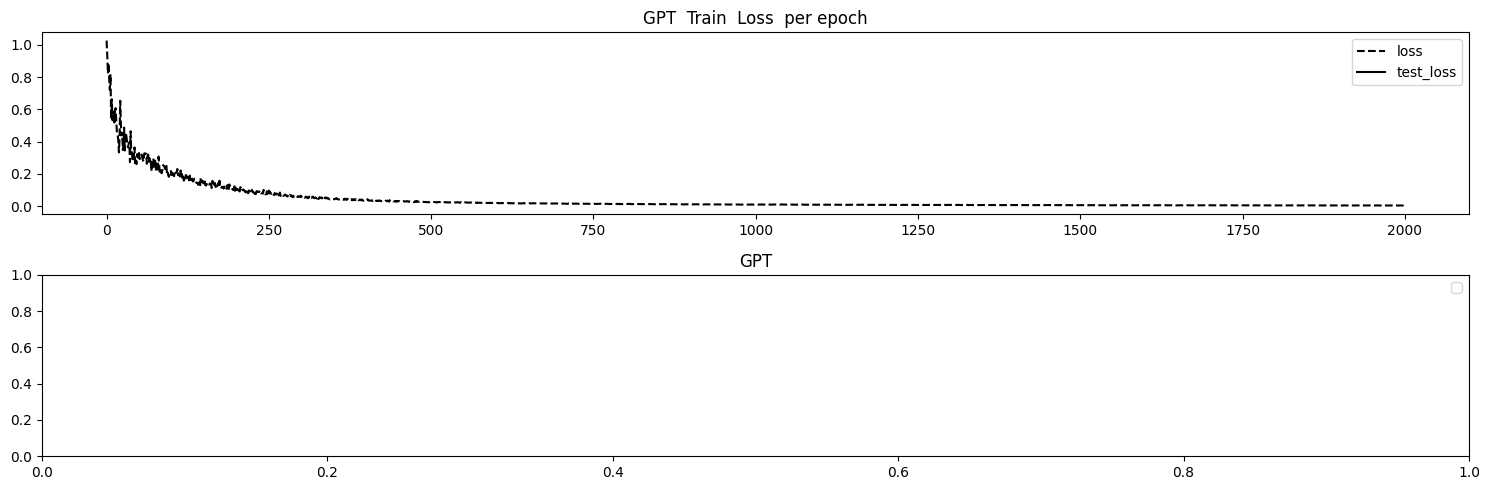

In [82]:

fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
tor

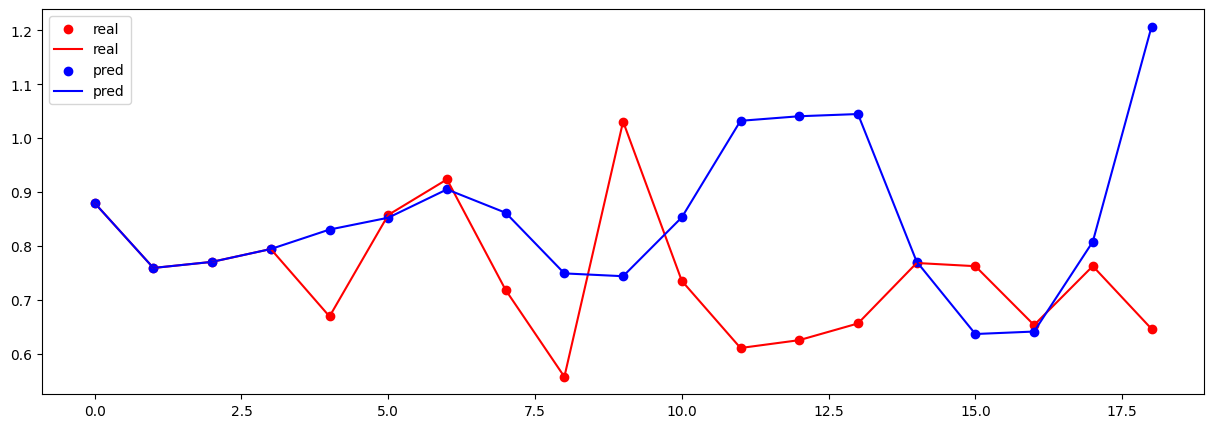

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


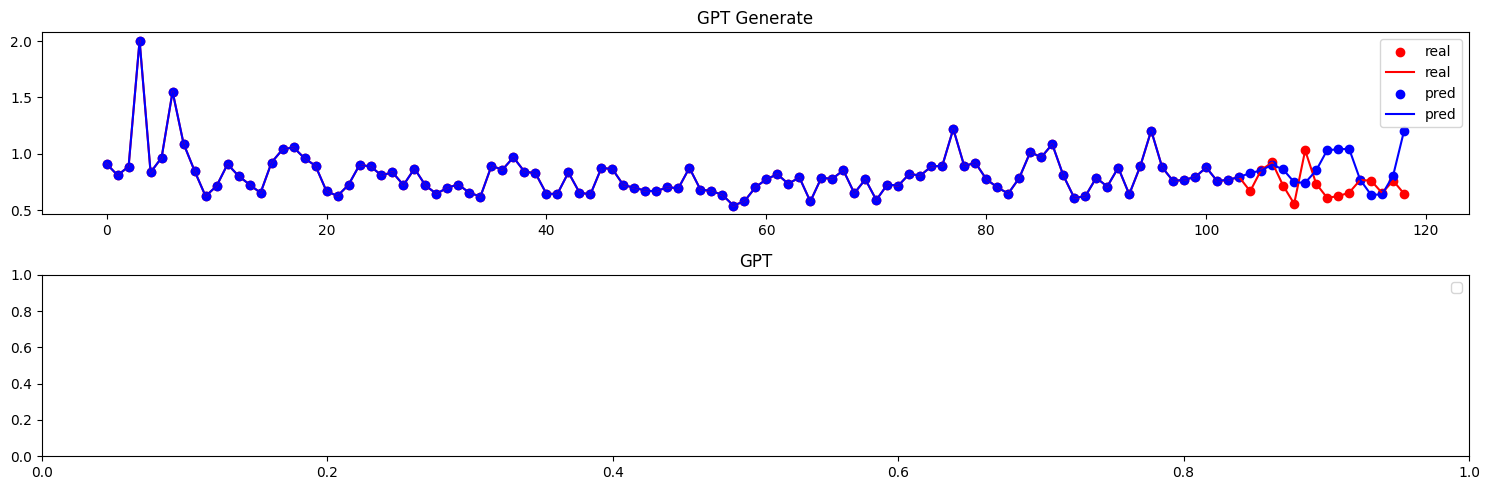

In [83]:


frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )

batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")




## Run 6


In [87]:

the_range = 100 + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


674

In [88]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

sliced_chunk_CIVS.shape 


(115, 24)

In [89]:

n = block_size

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

print(train_CIVS.shape)


(100, 24)


In [90]:

train_CIVS_2 = train_CIVS

si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT('GPT')


torch.Size([100, 24])
0 train loss =  1.1890077590942383
500 train loss =  0.02007894590497017
1000 train loss =  0.008186833001673222
1500 train loss =  0.006047164089977741


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


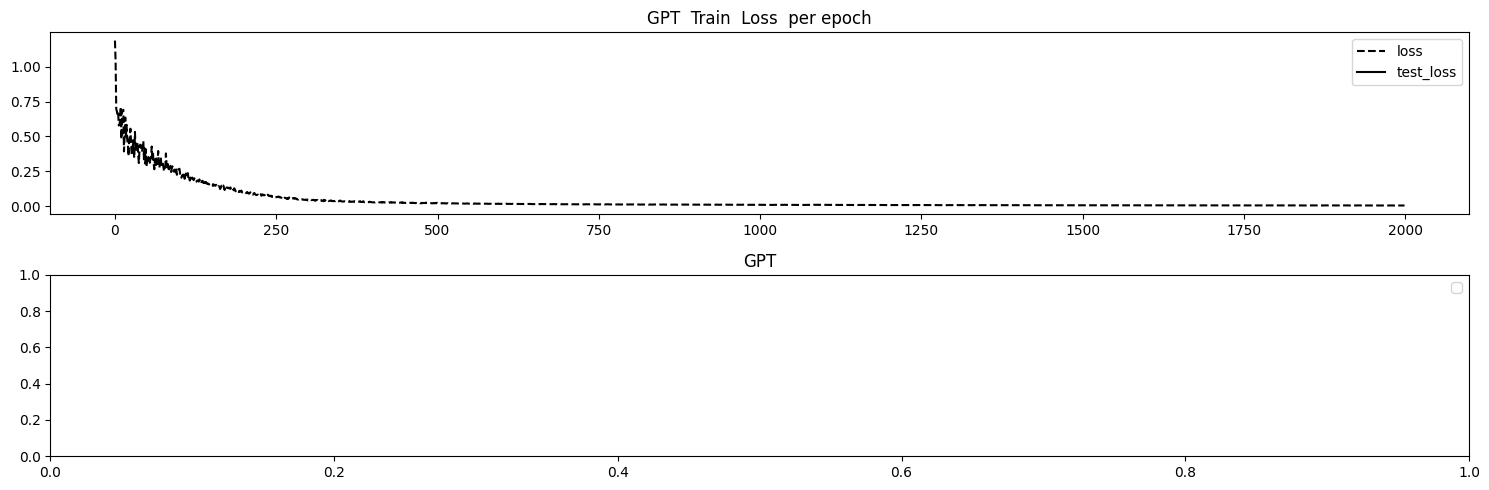

In [91]:

fig, ax = plt.subplots(2, 1) 
ax[0].set_title(f'GPT  Train  Loss  per epoch')
ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
ax[0].legend()
ax[1].set_title(f"GPT")

fig.tight_layout()
ax[1].legend(); plt.show()


torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 17, 24])
tor

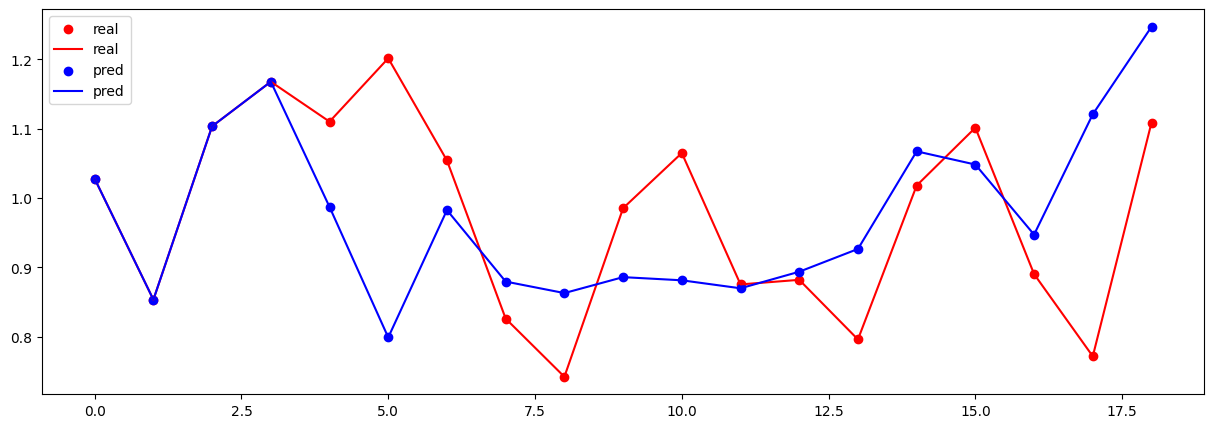

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


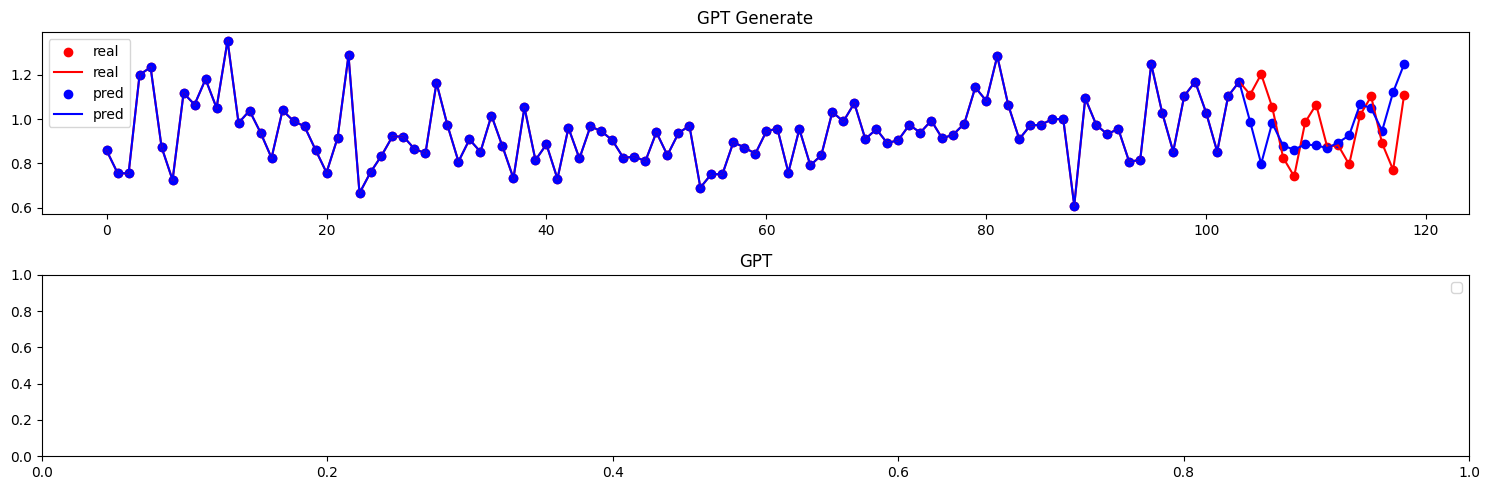

In [92]:


frames = [ train_CIVS[ -5: ], test_CIVS ]

test_CIVS_concat = pd.concat( frames )

test_CIVS_concat.shape

test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()

test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs

print(  test_CIVS_tr_scaled.shape )

batch_x_test = test_CIVS_tr_scaled

print( batch_x_test.shape )

GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI")


